In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

## This notebook is an investigation into the performance of the CDM in the same JYVA2 setup that worked for hb100

# Mishay walking towards radar V1 20khz

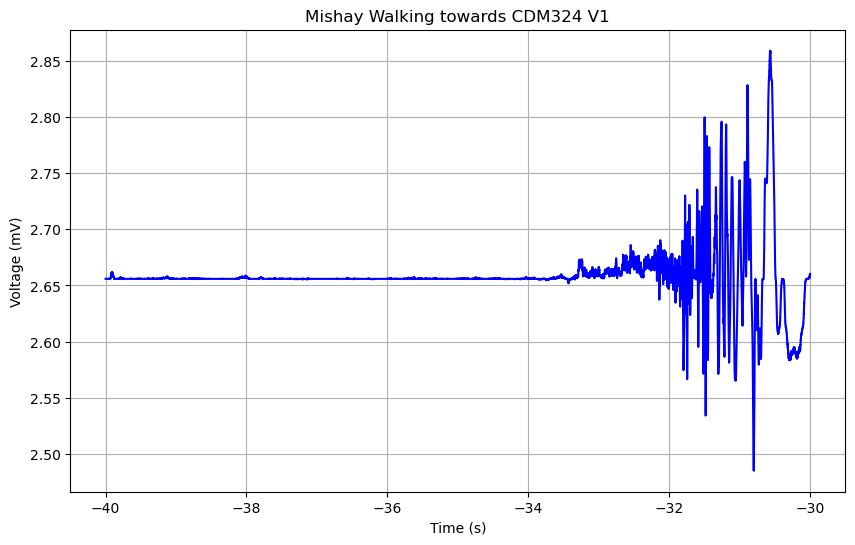

In [14]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('MishayWalkingTowardsRadar20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

voltage_data = voltage_data[200000:400000]
time_data = time_data[200000:400000]

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('Mishay Walking towards CDM324 V1')
plt.grid(True)

#plt.savefig('CDM324RawData.png')
# Show the plot
plt.show()


# Removing DC Shift

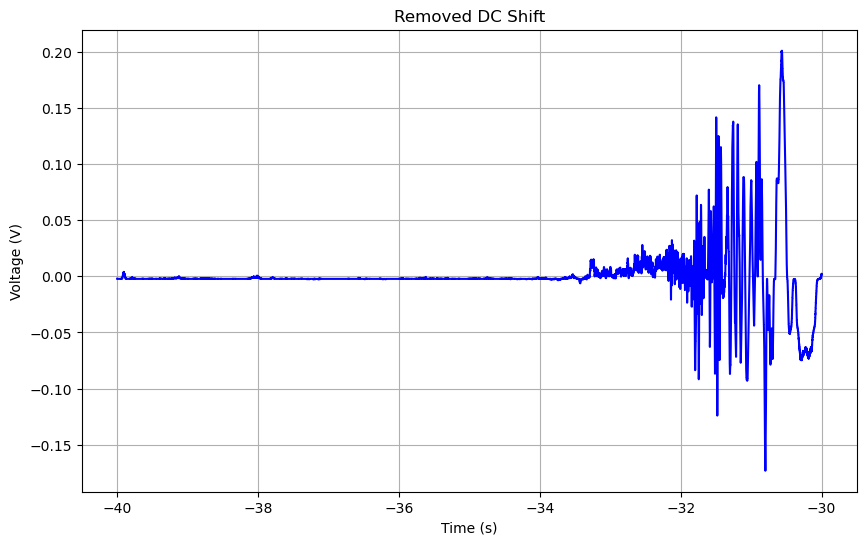

In [15]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Plotting DTFT

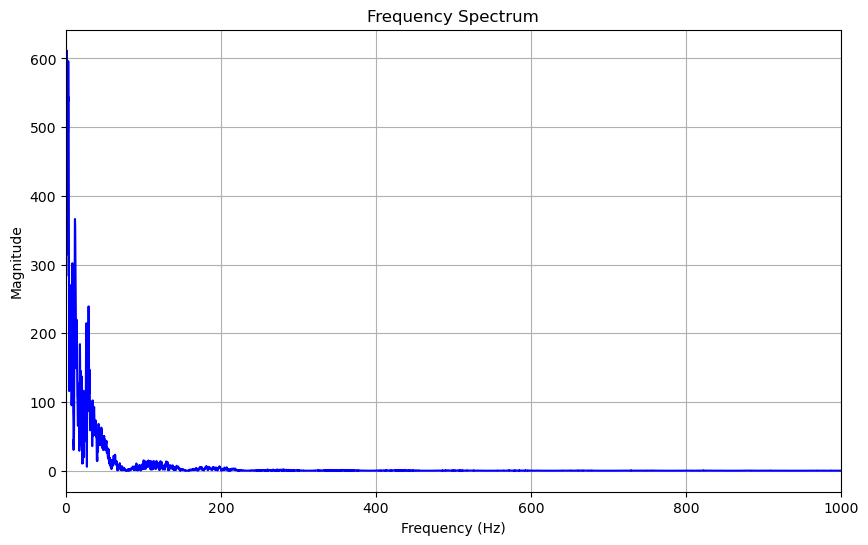

In [16]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

/Users/mishaynaidoo/anaconda3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


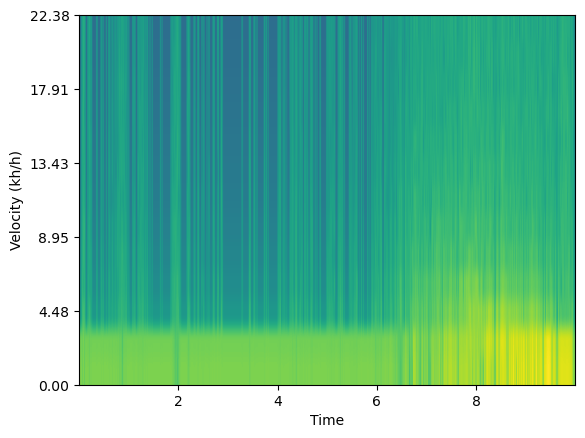

In [17]:
# Sample data
samplingFrequency = 20000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(voltage_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 44.68

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (kh/h)')

plt.show()


# Downsampling the data to 2khz by averaging extra samples

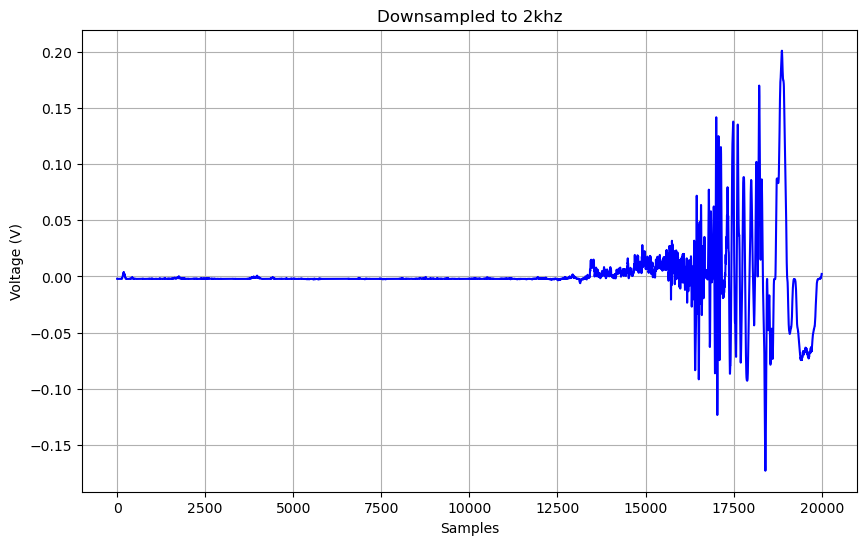

In [18]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 10

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 2khz')
plt.grid(True)

# Plotting spectrogram after downsampling

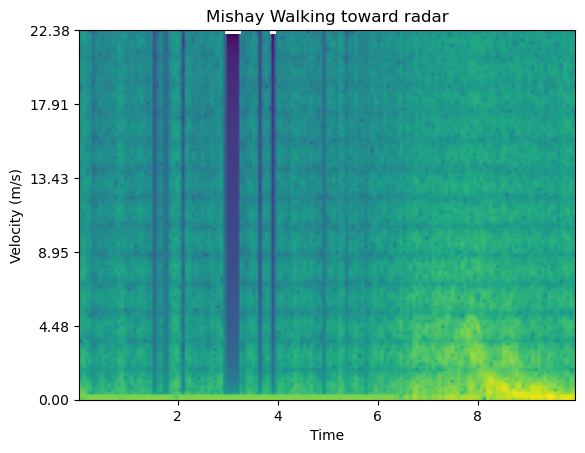

In [19]:
# Sample data
samplingFrequency = 2000

# Plot the spectrogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Define the scaling factor
scaling_factor = 1 / 44.68

# Define a custom y-axis formatter function
def custom_formatter(x, pos):
    # Scale the y-axis labels by dividing by the scaling factor
    scaled_value = x * scaling_factor
    return f'{scaled_value:.2f}'  # Format the label with two decimal places

# Create a custom y-axis formatter
formatter = FuncFormatter(custom_formatter)

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylim(0, 1000)
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Mishay Walking toward radar')

plt.show()
